#**Setup**

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from math import sqrt

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical 

# **Set Data**

In [ ]:
rawData = 'https://raw.githubusercontent.com/Rwyld/Data-Science-Models/main/RedesNeuronales/diabetes%20CSV.csv'

data = pd.read_csv(rawData)
data.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


# **Analisis Exploratorio**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


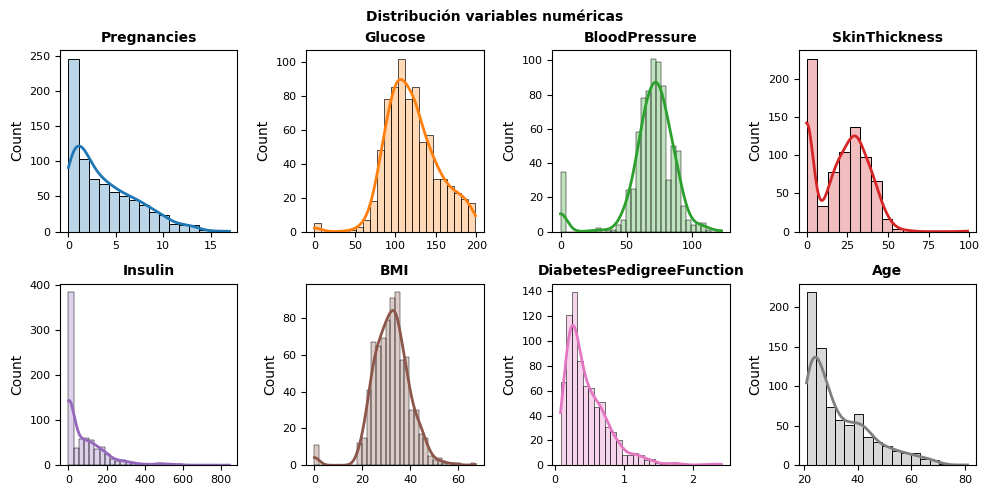

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(10,5))
axes = axes.flat
#data = data.select_dtypes(include=['float64', 'int']).columns

graphData = data.drop('Outcome', axis=1)

for i, colum in enumerate(graphData):
    sns.histplot(
        data    = graphData,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")


fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

**Resumen:** La data cargada no presenta datos faltantes o nulos. En cuanto a los datos visualizados en histogramas, no se observan posibles datos anomalos y las variables podemos observar una distribucion normal en Glucosa, BMI y BlooPressure.

# **Modelando Keras**

### **Split test/train data**

In [ ]:
X = data.drop('Outcome', axis = 1).values
y = data['Outcome'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2023)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

### **Definiendo la red**

In [ ]:
model = Sequential() 
model.add(Dense(100, activation='relu', input_dim=8)) 
model.add(Dense(50, activation='relu')) 
model.add(Dense(2, activation='sigmoid'))

### **Compilando**

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

### **Ajustando**

In [ ]:
model.fit(X_train, y_train,epochs=150, batch_size=10, verbose = False)

# **Predicciones y conclusion**

In [ ]:
predTraining = model.predict(X_train)
scores = model.evaluate(X_train, y_train, verbose=0)
print('Accuracy con la data train: {}% \n El error de la data de entrenamiento es: {}'.format(scores[1], 1 - scores[1]))   
 
predTesting= model.predict(X_test)
scores2 = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy con la data test: {}% \n El error de la data de testeo es: {}'.format(scores2[1], 1 - scores2[1]))    

22/22 [==============================] - 0s 1ms/step
Accuracy con la data train: 0.8972503542900085% 
 El error de la data de entrenamiento es: 0.10274964570999146
3/3 [==============================] - 0s 3ms/step
Accuracy con la data test: 0.8181818127632141% 
 El error de la data de testeo es: 0.1818181872367859


**Conclusión**: La red obtuvo un 89% de precision en los datos de entrenamiento y un 81% en los datos de testeo, a pesar de ser una precision buena, el modelo puede mejorar su precision si se configura con otros hiperparametros y con una mayor cantidad de datos.